In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

%matplotlib inline

In [2]:
data_file = os.path.join('D:', os.path.sep, 'prg', 'Datasets', 'general', 'pima-indians-diabetes.csv')
data_file

'D:\\prg\\Datasets\\general\\pima-indians-diabetes.csv'

In [3]:
df = pd.read_csv(data_file)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.groupby('Outcome').size()
# may use
# df['Outcome'].value_counts()


Outcome
0    500
1    268
dtype: int64

Outcome
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

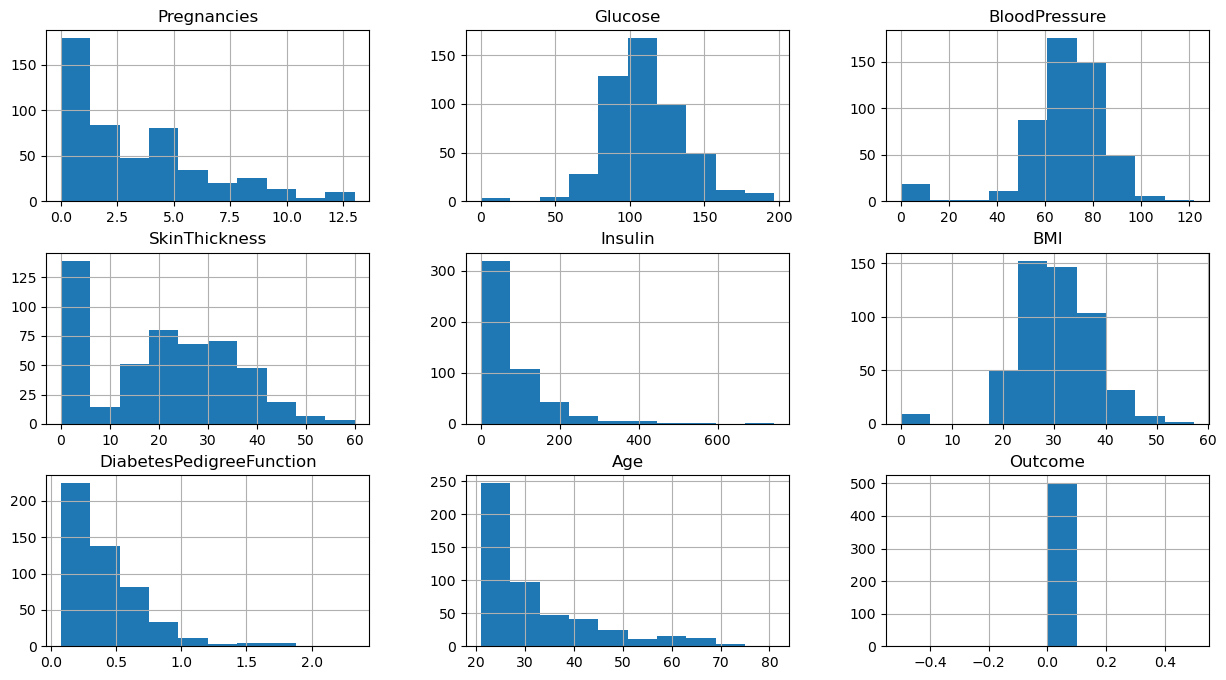

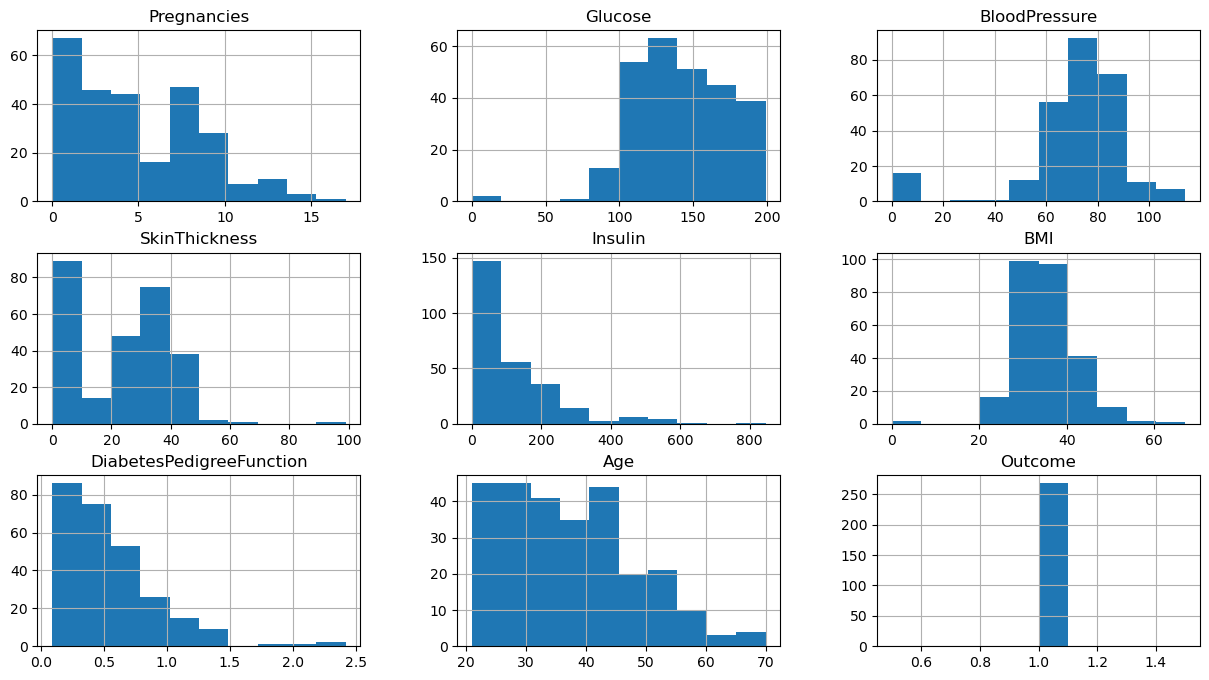

In [5]:
df.groupby('Outcome').hist(figsize=(15,8))

In [6]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## Preprocessing phase has intentionally left off

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

## Implement K Fold Cross validation with random forest classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model = RandomForestClassifier(n_estimators=100)

In [10]:
from sklearn.model_selection import KFold, cross_val_score

In [11]:
%%time
k_fold = KFold(n_splits=20, shuffle=True, random_state=101)

# may use accuracy, precision, recall or f1 for scoring too
val_score = cross_val_score(model, X, y, cv=k_fold, scoring='f1')


CPU times: total: 3.5 s
Wall time: 3.51 s


In [12]:
val_score

array([0.64285714, 0.72727273, 0.48      , 0.64      , 0.66666667,
       0.61538462, 0.57142857, 0.66666667, 0.6       , 0.54545455,
       0.56      , 0.62068966, 0.8       , 0.58823529, 0.8125    ,
       0.52173913, 0.66666667, 0.47619048, 0.48      , 0.88888889])

In [13]:
val_score.mean()

0.6285320523600906

Text(0.5, 1.0, 'Accuracy - Validation Score')

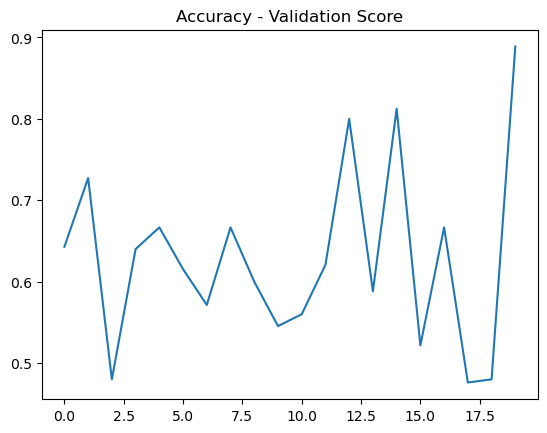

In [14]:
plt.plot(np.arange(0, len(val_score)), val_score)
plt.title("Accuracy - Validation Score")

## Validate multiple scores

In [15]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [16]:
%%time

n_split = 20
k_fold = KFold(n_splits=n_split, shuffle=True, random_state=101)

scoring = {'accuracy' : 'accuracy', 
           'precision' : 'precision',
           'recall' : 'recall', 
           'f1' : 'f1'}


scores = cross_validate(model, X, y, cv=k_fold, scoring=scoring)

CPU times: total: 2.56 s
Wall time: 2.56 s


In [17]:
scores

{'fit_time': array([0.11737108, 0.12731338, 0.13321781, 0.12284923, 0.11799169,
        0.11307812, 0.15978289, 0.11227584, 0.12586498, 0.12576342,
        0.12692809, 0.10829782, 0.13152575, 0.1289804 , 0.11630774,
        0.12358046, 0.11850595, 0.10664606, 0.12016463, 0.11980772]),
 'score_time': array([0.        , 0.        , 0.01692438, 0.00951099, 0.        ,
        0.        , 0.01000619, 0.        , 0.        , 0.        ,
        0.        , 0.0168674 , 0.        , 0.001019  , 0.        ,
        0.        , 0.01399803, 0.01562452, 0.0084343 , 0.00842929]),
 'test_accuracy': array([0.71794872, 0.82051282, 0.71794872, 0.82051282, 0.76923077,
        0.69230769, 0.74358974, 0.71794872, 0.81578947, 0.71052632,
        0.71052632, 0.73684211, 0.84210526, 0.78947368, 0.81578947,
        0.73684211, 0.71052632, 0.71052632, 0.63157895, 0.94736842]),
 'test_precision': array([0.64285714, 0.63636364, 0.5       , 0.91666667, 0.71428571,
        0.57142857, 0.54545455, 0.57894737, 0.75 

In [18]:
scores['test_accuracy']

array([0.71794872, 0.82051282, 0.71794872, 0.82051282, 0.76923077,
       0.69230769, 0.74358974, 0.71794872, 0.81578947, 0.71052632,
       0.71052632, 0.73684211, 0.84210526, 0.78947368, 0.81578947,
       0.73684211, 0.71052632, 0.71052632, 0.63157895, 0.94736842])

In [19]:
n_split

20

In [20]:
keys = [k for k in scores.keys()]

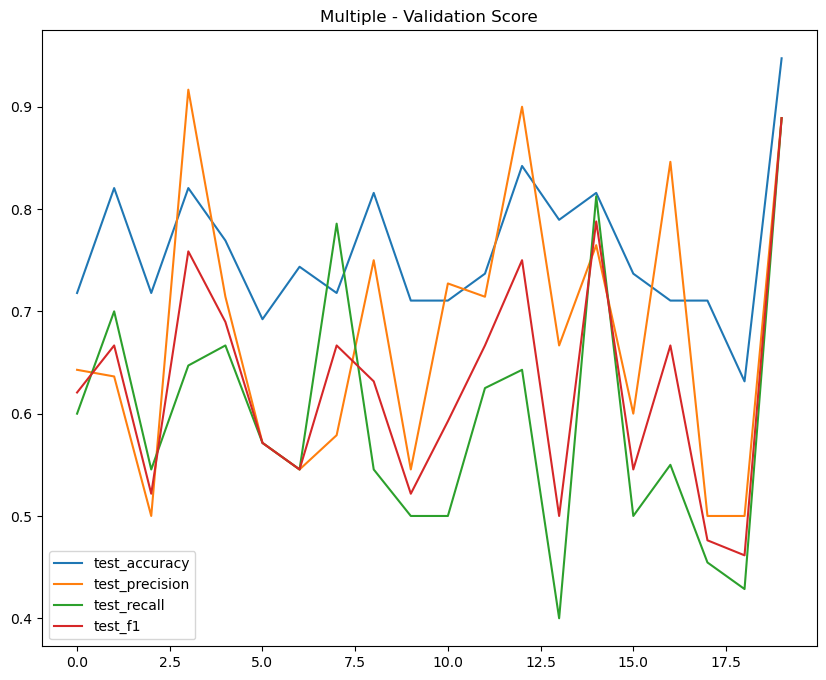

In [21]:
plt.figure(figsize=(10,8))

index = np.arange(0, n_split)
for key in keys[2:]:
    # print(key)
    plt.plot(index, scores[key])



plt.title("Multiple - Validation Score")
plt.legend(keys[2:], loc=0)